## 공공 인공지능 Open API 활용

- 2022.01.21 Colab에서는 접속 불가

In [2]:
with open('etriaikey.txt') as f:
  ai_key = f.read()

### 객체 검출
- 하나의 이미지 검출

In [3]:
img_file = 'cat.jfif'
img_type = img_file.split('.')[-1]
img_type

'jfif'

In [4]:
# JFIF 타입은 JPG로 변경
img_type = 'jpg' if img_type == 'jfif' else img_type

In [5]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [29]:
ㅑㅑㅡ

In [30]:
request_json = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [31]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [18]:
# 위와 같은 코드
"""
import requests
response = requests.post(
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    data=json.dumps(request_json))
"""

'\nimport requests\nresponse = requests.post(\n    openApiURL,\n    headers={"Content-Type": "application/json; charset=UTF-8"},\n    data=json.dumps(request_json))\n'

In [32]:
response.status

200

In [33]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"cat","confidence":"0.995404","x":"31","y":"40","width":"184","height":"129"}]}}'

In [35]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'cat',
    'confidence': '0.995404',
    'x': '31',
    'y': '40',
    'width': '184',
    'height': '129'}]}}

In [37]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'cat',
 'confidence': '0.995404',
 'x': '31',
 'y': '40',
 'width': '184',
 'height': '129'}

- 시각화

In [55]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

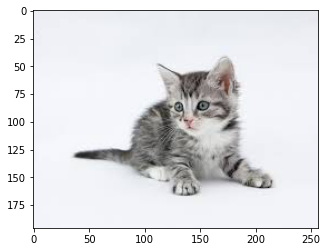

In [56]:
img = Image.open('사진/'+img_file)
plt.imshow(img);

In [73]:
img = Image.open('사진/'+img_file)
draw = ImageDraw.Draw(img)
obj = obj_list[0]
name = obj['class']
x = int(obj['x'])
y = int(obj['y'])
w = int(obj['width'])
h = int(obj['height'])
draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=1)
draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',15), fill=(255,0,0))

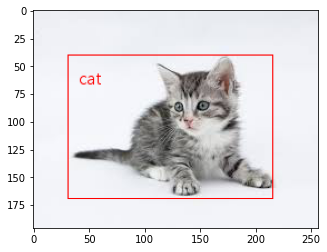

In [74]:
plt.imshow(img);